### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.

In [1]:
# Melakukan import method SparkSession dari library pyspark.sql
from pyspark.sql import SparkSession

# Membuat atau mendapatkan sebuah sesi dengan nama Week 9 
spark = SparkSession.builder.appName("Week 9").getOrCreate()

# Membuat contoh datanya yang nantinya akan digunakan
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]

# Membuat nama - nama dari kolomnya
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

# Membuat dataframe pyspark dan disimpan kedalam variabel df
df = spark.createDataFrame(data, schema=columns)
# Menambahkan dataframe tersebut kedalam table sql milik Spark SQL dengan nama table `employees`
df.createOrReplaceTempView('employees')

# Menampilkan seluruh isi dan seluruh kolom pada table employees
spark.sql('SELECT * FROM employees').show()

# Menampilkan kolom nama, umur dari table employees yang di filter bedasarkan Salary yang jumlahnya lebih dari 3000
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

# Menampilkan rata - rata dari field Salary
spark.sql('SELECT AVG(Salary) FROM employees').show()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/27 19:14:18 WARN Utils: Your hostname, figo-Vostro-V131, resolves to a loopback address: 127.0.1.1; using 10.151.86.75 instead (on interface wlp9s0)
25/10/27 19:14:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/27 19:14:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [2]:
# Menampilkan field gender, total dari Salaray, dan umur dari tabel employees yang di grouping bedasarkan jenis kelamin dan umur
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**: 
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [3]:
# Mencari rata - rata gaji perdepartemen
spark.sql('''
SELECT DeptId, AVG(Salary) as AverageSalary
FROM employees
GROUP BY DeptId
''').show()

# Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
spark.sql('''
SELECT Name, Salary
FROM employees
WHERE Salary > (SELECT AVG(Salary) as AverageSalary
FROM employees
WHERE Gender = "M")
UNION ALL 
SELECT Name, Salary
FROM employees
WHERE Salary > (SELECT AVG(Salary) as AverageSalary
FROM employees
WHERE Gender = "F")
''').show()

# Buat ranking karyawan berdasarkan gaji dalam departemen mereka.
spark.sql('''
SELECT Name, DeptId, Salary, ROW_NUMBER() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as rank
FROM employees
''').show()


+------+-------------+
|DeptId|AverageSalary|
+------+-------------+
|     1|       2850.0|
|     2|       4100.0|
+------+-------------+

+-----+------+
| Name|Salary|
+-----+------+
|James|  3000|
| Anna|  4100|
+-----+------+

+-----+------+------+----+
| Name|DeptId|Salary|rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.

In [4]:
# MEenampilkan top 3 besar karyawan dengan gaji tertinggi pada usia tertentu
spark.sql('''
SELECT Name, Age, Salary, rank
FROM (
    SELECT 
        Name, 
        Age, 
        Salary,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS rank
    FROM employees
) temp
WHERE rank <= 3
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [5]:
# Melakukan import method SparkSession dari library pyspark.sql
from pyspark.sql import SparkSession
# Membuat atau mendapatkan sebuah sesi dengan nama Week 9 
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Membuat data employees yang nantinya akan digunakan 
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

# Membuat data departements yang nantinya akan digunakan 
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

# Membuat data projects yang nantinya akan digunakan 
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

# Menambahkan dataframe employees kedalam table sql milik Spark SQL dengan nama table `employees`
employees.createOrReplaceTempView('employees')
# Menambahkan dataframe departements kedalam table sql milik Spark SQL dengan nama table `departements`
departments.createOrReplaceTempView('departments')
# Menambahkan dataframe projects kedalam table sql milik Spark SQL dengan nama table `projects`
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

25/10/27 19:14:43 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [6]:
# Query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
spark.sql('''
SELECT e.Name, d.DeptName, e.Salary, 
AVG(e.Salary) OVER (PARTITION BY e.deptId) as rataRataDept,
ROW_NUMBER() OVER (PARTITION BY e.deptId ORDER BY Salary DESC) as rank
FROM employees as e 
JOIN departments as d ON e.deptId = d.deptId
''').show()


# Query untuk menentukan tren gaji berdasarkan usia di setiap departemen.
spark.sql('''
SELECT 
d.DeptName,
e.Name,
e.Age,
e.Salary,
(e.Salary - LAG(e.Salary, 1) OVER (PARTITION BY d.DeptName ORDER BY e.Age ASC)) AS TrenSalary
FROM employees as e
JOIN departments as d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()

+-----+---------+------+------------+----+
| Name| DeptName|Salary|rataRataDept|rank|
+-----+---------+------+------------+----+
|James|       HR|  3000|      2850.0|   1|
|  Lee|       HR|  2700|      2850.0|   2|
| Anna|Marketing|  4100|      4100.0|   1|
+-----+---------+------+------------+----+

+---------+-----+---+------+----------+
| DeptName| Name|Age|Salary|TrenSalary|
+---------+-----+---+------+----------+
|       HR|  Lee| 23|  2700|      NULL|
|       HR|James| 34|  3000|       300|
|Marketing| Anna| 28|  4100|      NULL|
+---------+-----+---+------+----------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


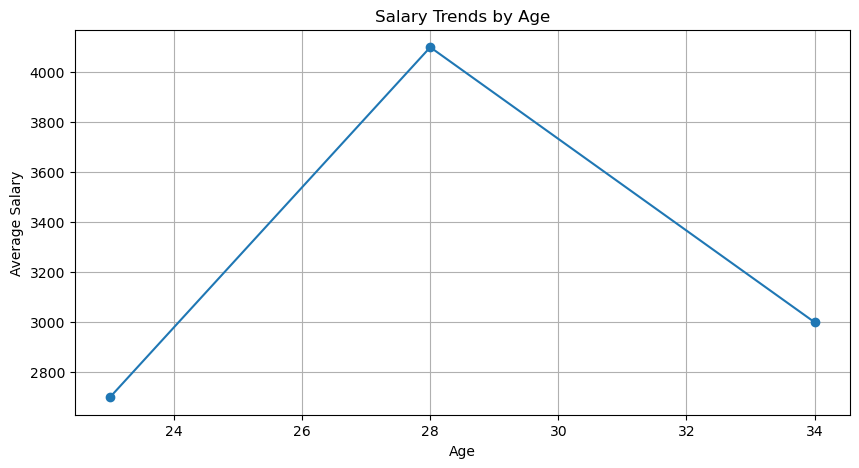

In [7]:
# Import library matplotlib dan pandas
import matplotlib.pyplot as plt
import pandas as pd

# Mencar umur dan rata - rata gaji berdasarkan umur
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends

# Ukuran canvas grafik panjang 10 dan lebar 5
plt.figure(figsize=(10, 5))

# Data yang akan diploting age sebagai sumbu x dan rata - rata gaji sebagai sumbu y
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')

# Pemberian label untuk setiap sumbu
plt.xlabel('Age')
plt.ylabel('Average Salary')

# Judul
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.


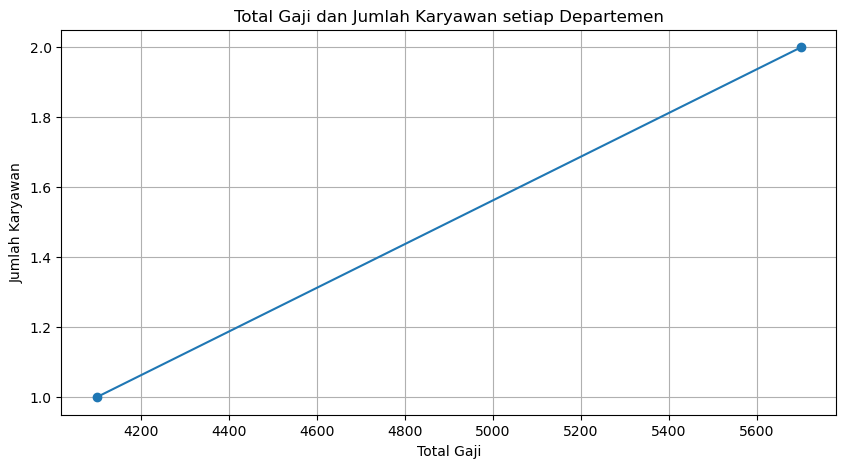

,deptName,TotalGaji,JumlahKaryawan
0,HR,5700,2
1,Marketing,4100,1


In [8]:
# Import library matplotlib dan pandas
import matplotlib.pyplot as plt
import pandas as pd

# Mencari jumlah total gaji dan jumlah karyawan setiap departemen
dataPlotting = spark.sql('''
SELECT d.deptName, sum(Salary) AS TotalGaji, count(*) as JumlahKaryawan
FROM employees AS e JOIN departments as d
ON e.deptId = d.deptId
GROUP BY d.deptName
''').toPandas()

# Visualization of salary trends

# Ukuran canvas grafik panjang 10 dan lebar 5
plt.figure(figsize=(10, 5))

# Data yang akan diploting totalGaji sebagai sumbu x dan jumlahKaryawan gaji sebagai sumbu y
plt.plot(dataPlotting['TotalGaji'], dataPlotting['JumlahKaryawan'], marker='o')

# Pemberian label untuk setiap sumbu
plt.xlabel('Total Gaji')
plt.ylabel('Jumlah Karyawan')

# Judul
plt.title('Total Gaji dan Jumlah Karyawan setiap Departemen')
plt.grid(True)
plt.show()

dataPlotting.head()

### 6. Homework
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.


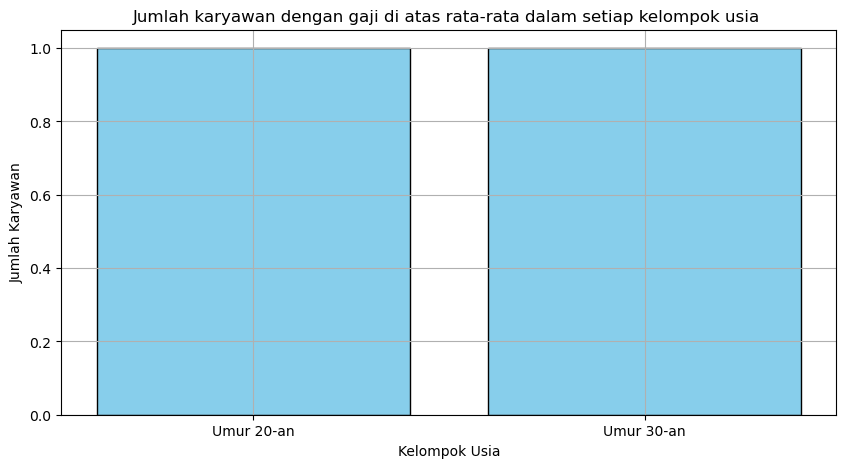

,Name,Age,Salary,KelompokUsia,RataRataGaji
0,Anna,28,4100,Umur 20-an,3400.0
1,James,34,3000,Umur 30-an,3000.0


In [9]:
# Import library matplotlib dan pandas
import matplotlib.pyplot as plt
import pandas as pd

# Mencari karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia 
dataPlotting2 = spark.sql('''
WITH pengelompokanUsia AS (
    SELECT 
        e.Name,
        e.Age,
        e.Salary,
        CASE
            WHEN e.Age BETWEEN 20 AND 29 THEN 'Umur 20-an'
            WHEN e.Age BETWEEN 30 AND 39 THEN 'Umur 30-an'
            ELSE 'Ketuaan'
        END AS KelompokUsia
    FROM employees e
),
rataUsia AS (
    SELECT 
        Name,
        Age,
        Salary,
        KelompokUsia,
        AVG(Salary) OVER (PARTITION BY KelompokUsia) AS RataRataGaji
    FROM pengelompokanUsia
)
SELECT *
FROM rataUsia
WHERE Salary >= RataRataGaji
ORDER BY KelompokUsia, Salary DESC
''').toPandas()



# Visualization of salary trends

# Ukuran canvas grafik panjang 10 dan lebar 5
plt.figure(figsize=(10, 5))

# menghitung jumlah orang per usia
jumlahPerUsia = dataPlotting2['KelompokUsia'].value_counts()

# Data yang akan diploting index dari jumlahPerUsia sebagai sumbu x dan nilai dari jumlahPerUsia sebagai sumbu y
plt.bar(jumlahPerUsia.index, jumlahPerUsia.values, color='skyblue', edgecolor='black')

# Pemberian label untuk setiap sumbu
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Karyawan')

# Judul
plt.title('Jumlah karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia ')
plt.grid(True)
plt.show()

dataPlotting2.head()

### 6. Homework
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


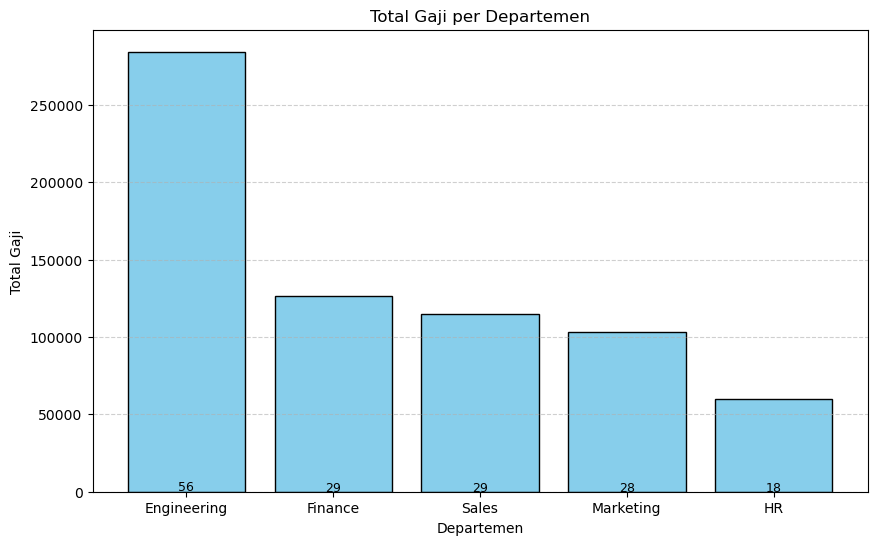

,DeptName,JumlahKaryawan,TotalGaji,RataRataGaji
0,Engineering,56,284400.0,5078.57
1,Finance,29,126200.0,4351.72
2,Sales,29,114800.0,3958.62
3,Marketing,28,103400.0,3692.86
4,HR,18,59900.0,3327.78


In [10]:
# Mengambil dataset csv dan mengubahnya kedalam spark dataframe
departmentsCSV = spark.read.csv('./departments_dataset.csv', header=True)
employeesCSV = spark.read.csv('./employees_dataset.csv', header=True)
projectsCSV = spark.read.csv('./projects_dataset.csv', header=True)

# Menambahkan dataset tersebut menjadi tabel sql ada spark sql
employeesCSV.createOrReplaceTempView("employees")
departmentsCSV.createOrReplaceTempView("departments")
projectsCSV.createOrReplaceTempView("projects")

# membuat data untuk di ploting yaitu data total gaji setiap departemen dan total karyawannya
dataPlot = spark.sql("""
SELECT 
    d.DeptName,
    COUNT(e.Name) AS JumlahKaryawan,
    SUM(e.Salary) AS TotalGaji,
    ROUND(AVG(e.Salary), 2) AS RataRataGaji
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalGaji DESC
""").toPandas()

# Visualisasi gabungan dalam 1 grafik batang
plt.figure(figsize=(10,6))

# Data yang akan diploting nama departement sebagai sumbu x dan total gaji sebagai sumbu y
plt.bar(dataPlot['DeptName'], dataPlot['TotalGaji'], color='skyblue', edgecolor='black')

# Tambahkan teks yaitu jumlah dari karyawannya di pada diagram batang tersebut (total gaji) 
for i, val in enumerate(dataPlot['JumlahKaryawan']):
    plt.text(i, val + 500, f"{val:.0f}", ha='center', fontsize=9)

# Judul dari diagram batang
plt.title('Total Gaji per Departemen')

# Label dari setiap sumbu
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Tampilkan hasil SQL dalam tabel
dataPlot.head()